# Exploratory Analysis Exercise

- Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.
- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 
- For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import acquire

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Store Dataset

In [2]:
store_data= acquire.combine()

In [3]:
store_data.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [4]:
## Taken from lesson review. Replace after prepare is finished.

def prep_store_data(df):
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    # make sure we sort by date/time before resampling or doing other time series manipulations
    df = df.set_index('sale_date').sort_index()
    df = df.rename(columns={'sale_amount': 'quantity'})
    df['month'] = df.index.month
    df['dow'] = df.index.day_name()
    df['sales_total'] = df.quantity * df.item_price
    return df

In [5]:
store_data = prep_store_data(store_data)

In [6]:
store_data.head()

,item,quantity,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,dow,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,25.16


### Split store

In [7]:
store_data.index.min(), store_data.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [8]:
store_data.index.year.value_counts().sort_index()

2013    182500
2014    182500
2015    182500
2016    183000
2017    182500
Name: sale_date, dtype: int64

In [9]:
store_data.index.month.value_counts().sort_index()

1     77500
2     70500
3     77500
4     75000
5     77500
6     75000
7     77500
8     77500
9     75000
10    77500
11    75000
12    77500
Name: sale_date, dtype: int64

In [10]:
store_data.index.day.value_counts().sort_index()

1     30000
2     30000
3     30000
4     30000
5     30000
6     30000
7     30000
8     30000
9     30000
10    30000
11    30000
12    30000
13    30000
14    30000
15    30000
16    30000
17    30000
18    30000
19    30000
20    30000
21    30000
22    30000
23    30000
24    30000
25    30000
26    30000
27    30000
28    30000
29    28000
30    27500
31    17500
Name: sale_date, dtype: int64

- Something to explore later. Is the lack of data for 29 to 31 accounted for because of the number of days in each month?

In [11]:
store_data.index.hour.value_counts().sort_index()

0    913000
Name: sale_date, dtype: int64

In [12]:
### Using the human-based split method and just using the last year as test.
store_train = store_data[:'2016']
store_test = store_data['2017']

/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_10677/1667316166.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  store_test = store_data['2017']


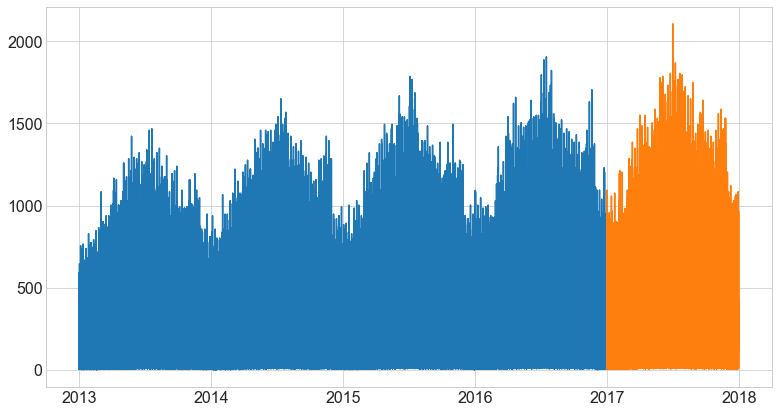

In [13]:
plt.plot(store_train.index, store_train.sales_total)
plt.plot(store_test.index, store_test.sales_total)
plt.show()

In [14]:
# split between data and target. For store data we will use sales total as the target.
store_y = store_train.sales_total

## OPSD Dataset

In [15]:
opsd = acquire.get_power_data()

In [16]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
# Same as above. Taken from lesson. Replace after prepare is finished.
def prep_opsd_data(df):
    df.columns = [column.replace('+','_').lower() for column in df]
    df.date = pd.to_datetime(df.date)
    df = df.set_index('date').sort_index()
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    df = df.fillna(0)
    df['wind_solar'] = df.wind + df.solar
    return df

In [18]:
opsd = prep_opsd_data(opsd)
opsd.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


### Split opsd

In [19]:
opsd.index.min(), opsd.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [20]:
opsd.index.year.value_counts().sort_index()

2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
Name: date, dtype: int64

In [21]:
opsd.index.month.value_counts().sort_index()

1     372
2     339
3     372
4     360
5     372
6     360
7     372
8     372
9     360
10    372
11    360
12    372
Name: date, dtype: int64

In [22]:
opsd.index.day.value_counts().sort_index()

1     144
2     144
3     144
4     144
5     144
6     144
7     144
8     144
9     144
10    144
11    144
12    144
13    144
14    144
15    144
16    144
17    144
18    144
19    144
20    144
21    144
22    144
23    144
24    144
25    144
26    144
27    144
28    144
29    135
30    132
31     84
Name: date, dtype: int64

In [23]:
opsd.index.hour.value_counts().sort_index()

0    4383
Name: date, dtype: int64

In [24]:
### Using the human-based split method and just using the last year as test.
opsd_train = opsd[:'2016']
opsd_test = opsd['2017']

/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_10677/8316703.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  opsd_test = opsd['2017']


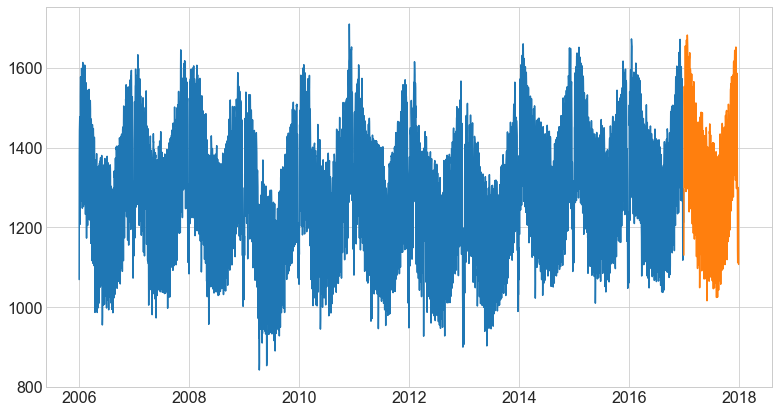

In [25]:
plt.plot(opsd_train.index, opsd_train.consumption)
plt.plot(opsd_test.index, opsd_test.consumption)
plt.show()

In [26]:
# split between data and target. For store data we will use consumption as the target.
opsd_y = opsd_train.consumption

# Visuals

## 1) Blow off the time series

<AxesSubplot:ylabel='Frequency'>

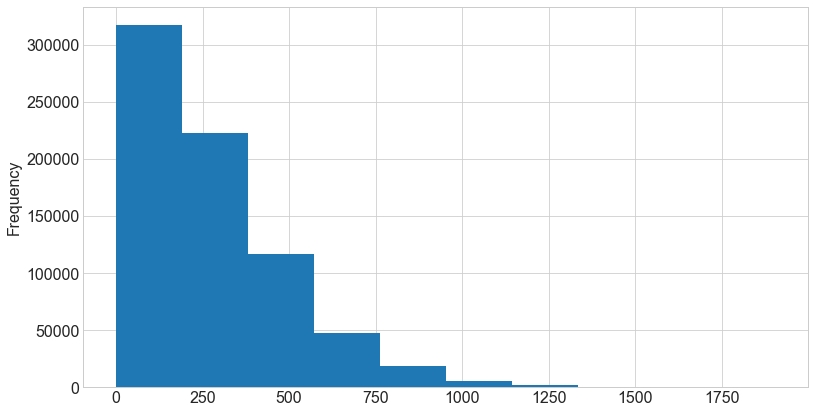

In [27]:
store_y.plot.hist()

[Text(0.5, 1.0, 'Average total sales per month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'total sales')]

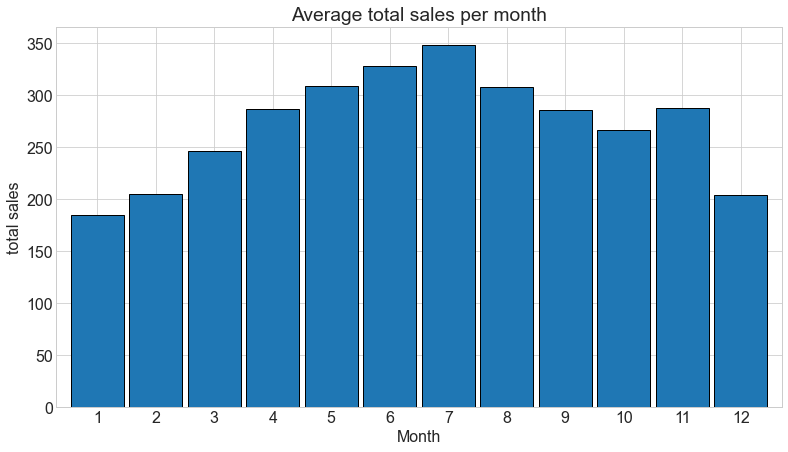

In [28]:
ax = store_y.groupby(store_y.index.month).mean().plot.bar(width=.9,ec='black')
plt.xticks(rotation=0)
ax.set(title='Average total sales per month',xlabel='Month', ylabel='total sales')

[Text(0.5, 1.0, 'Average total sales per weekday'),
 Text(0.5, 22.200000000000003, 'weekday'),
 Text(22.200000000000003, 0.5, 'total sales')]

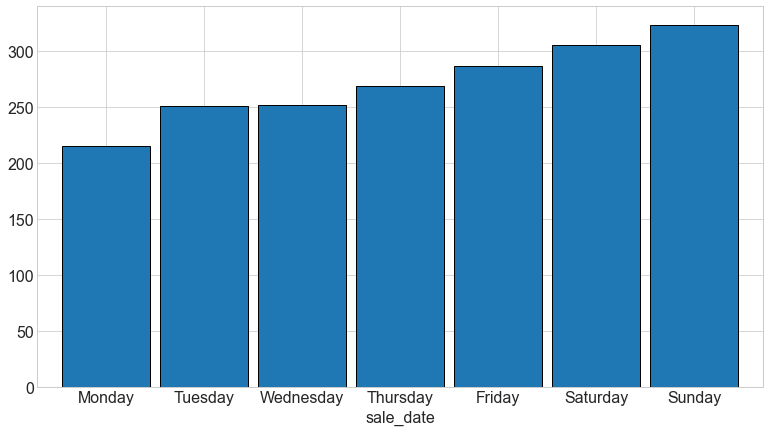

In [29]:
store_y.groupby(store_y.index.day_name()).mean().sort_values().plot.bar(width=.9,ec='black')
plt.xticks(rotation=0)
ax.set(title='Average total sales per weekday', xlabel='weekday',ylabel='total sales')

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

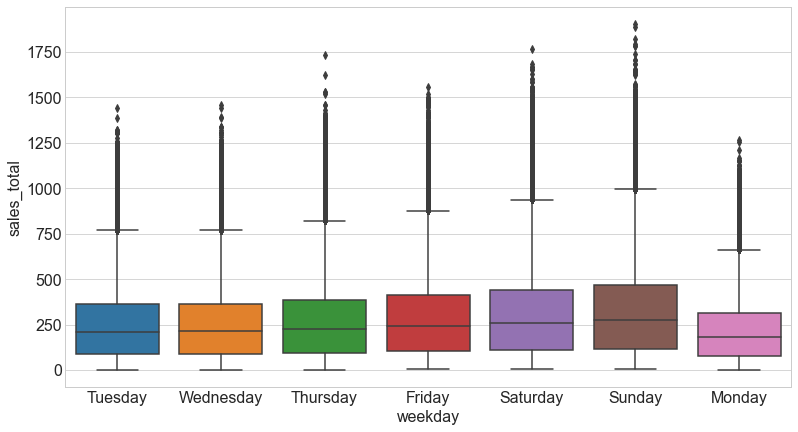

In [30]:
(
store_y.reset_index()
.assign(weekday=lambda store_data: store_y.index.day_name())
.pipe((sns.boxplot, 'data'), y='sales_total', x='weekday')
)

## 2) y over time

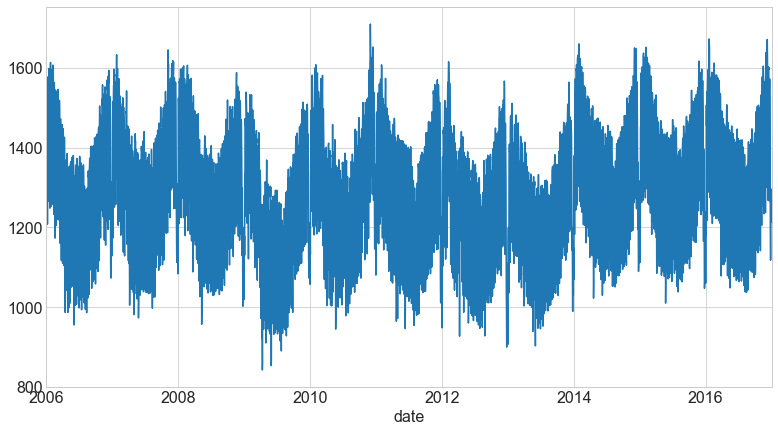

In [31]:
opsd_y.plot()
plt.show()

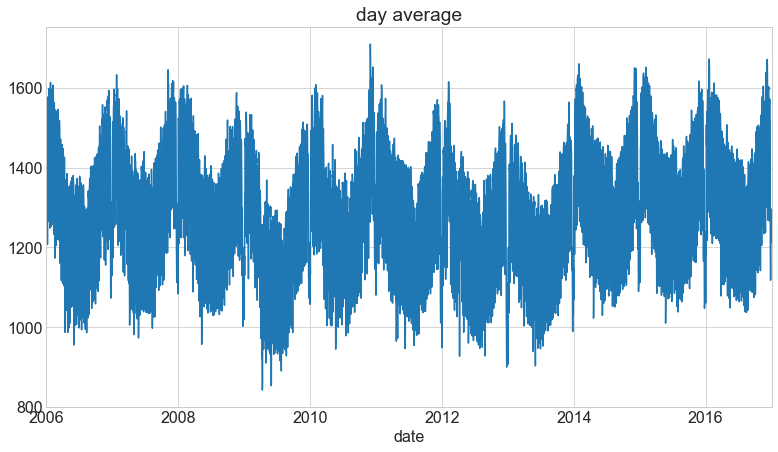

In [32]:
opsd_y.resample('d').mean().plot(title='day average')
plt.show()

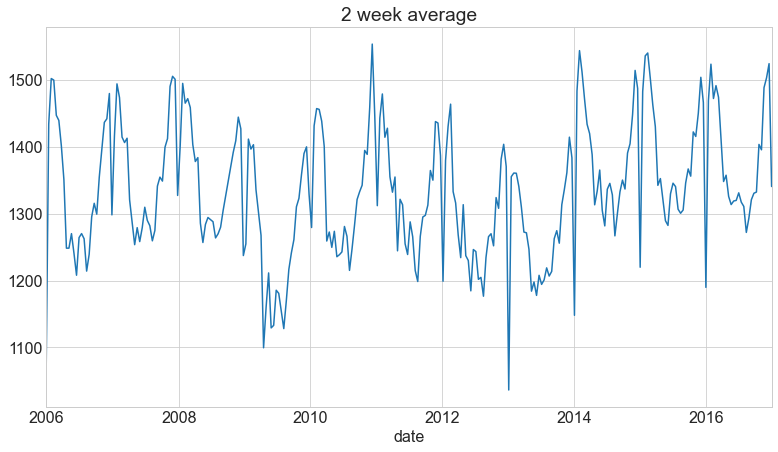

In [33]:
opsd_y.resample('2W').mean().plot(title='2 week average')
plt.show()

## 3) y averaged over various periods over time

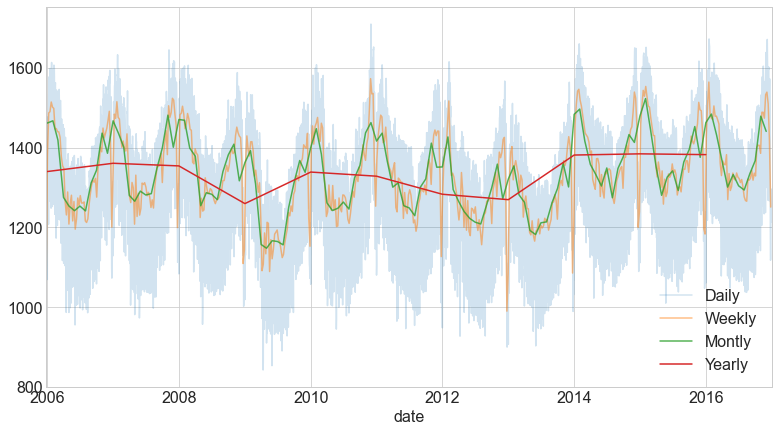

In [34]:
opsd_y.plot(alpha = .2, label='Daily')
opsd_y.resample('W').mean().plot(alpha=.5, label='Weekly')
opsd_y.resample('M').mean().plot(alpha=.8, label='Montly')
opsd_y.resample('Y').mean().plot(label='Yearly')
plt.legend()

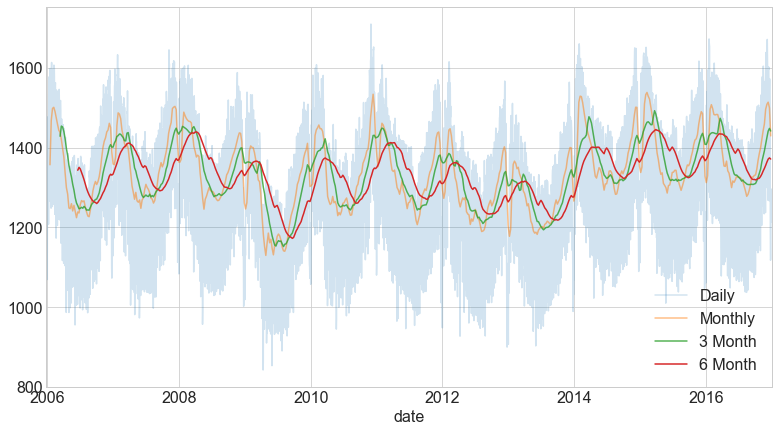

In [35]:
opsd_y.plot(alpha = .2, label='Daily')
opsd_y.resample('W').mean().rolling(4).mean().plot(alpha=.5, label='Monthly')
opsd_y.resample('W').mean().rolling(12).mean().plot(alpha=.8, label='3 Month')
opsd_y.resample('W').mean().rolling(26).mean().plot(label='6 Month')
plt.legend()

## 4) change in y over time

<AxesSubplot:title={'center':'Average week-to-week change in sale_total'}, xlabel='sale_date'>

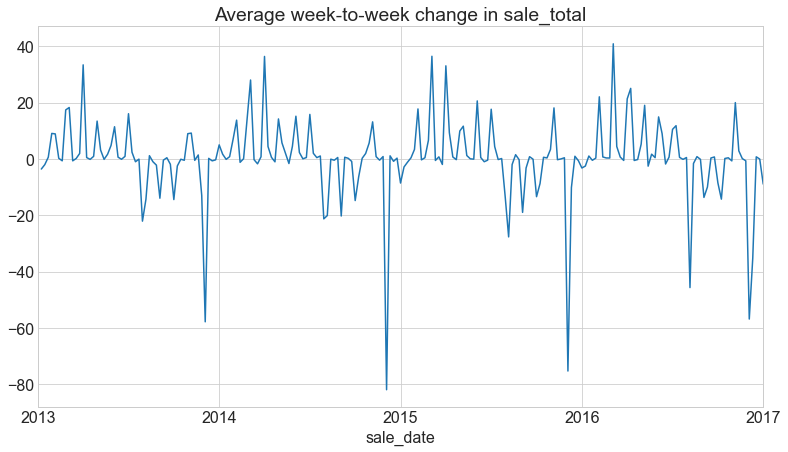

In [36]:
store_y.resample('W').mean().diff().plot(title='Average week-to-week change in sale_total')

<AxesSubplot:title={'center':'Average monthly change in sale_total'}, xlabel='sale_date'>

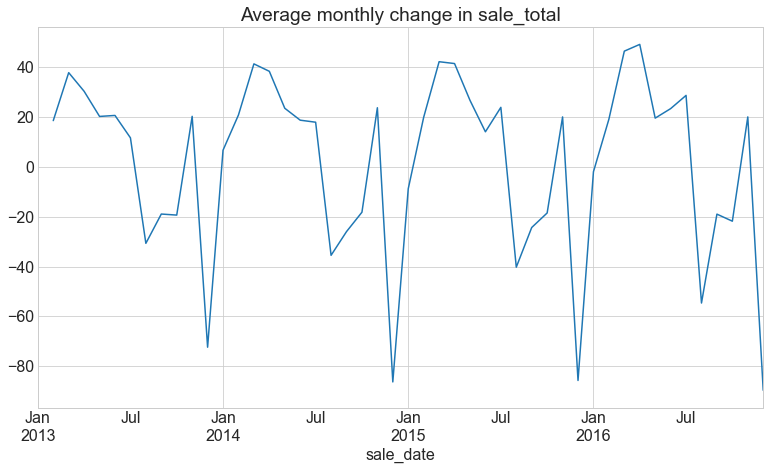

In [37]:
store_y.resample('M').mean().diff().plot(title='Average monthly change in sale_total')

[Text(0.5, 1.0, 'Sales over time')]

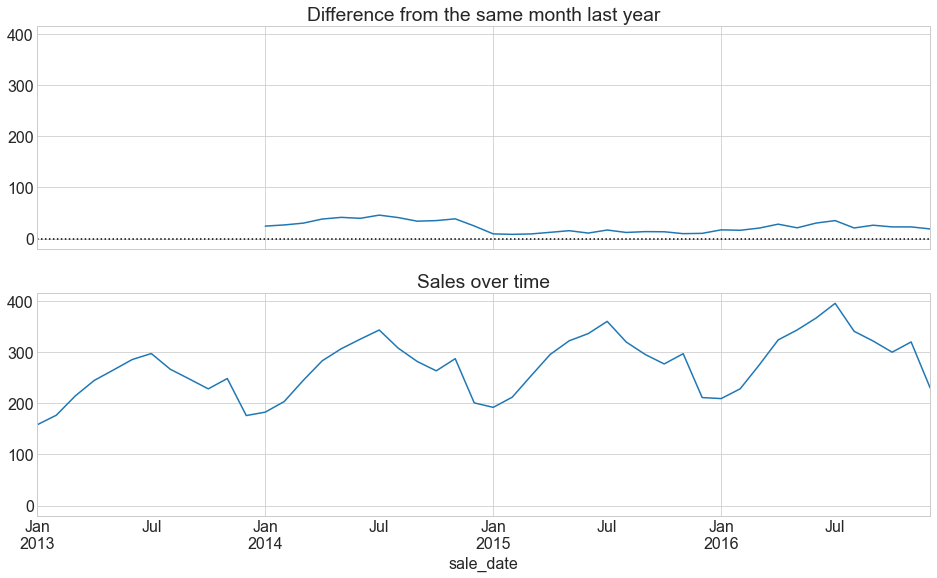

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, sharey = True, figsize=(16,9))

ax = store_y.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black',ls=':')
ax1.set(title='Difference from the same month last year')

store_y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Sales over time')

## 5) Seasonal Plot

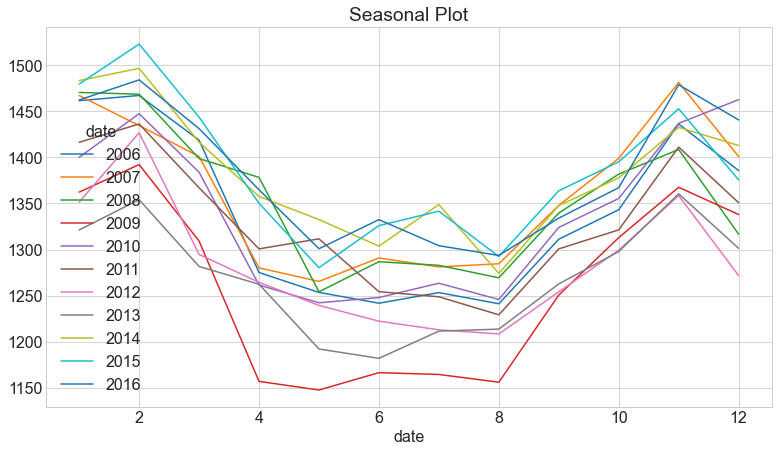

In [39]:
# note from lesson (.unstack turns an index level into columns)
opsd_y.groupby([opsd_y.index.year,opsd_y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

## 6) Seasonal subseries plot

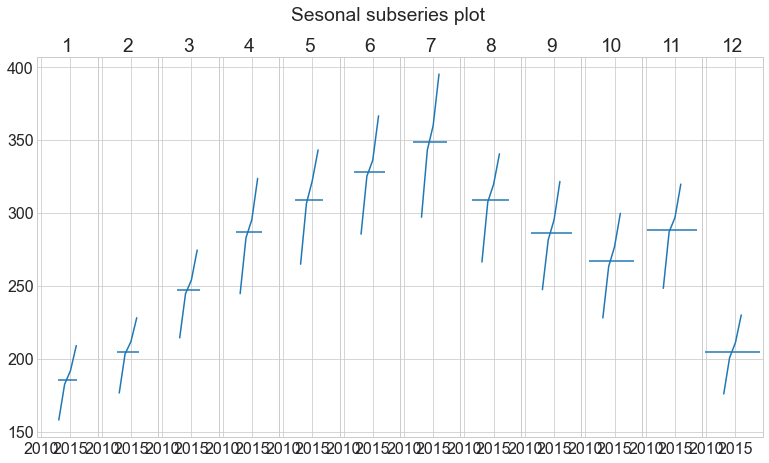

In [40]:
table = store_y.groupby([store_y.index.year, store_y.index.month]).mean().unstack()

fig, axs = plt.subplots(1,12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Sesonal subseries plot')
fig.subplots_adjust(wspace=0)

## 7) Lag plot

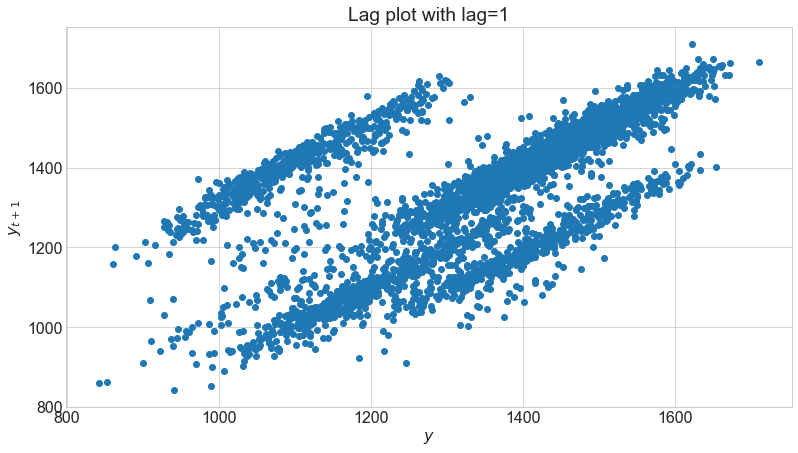

In [41]:
plt.scatter(opsd_y,opsd_y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')
plt.show()

/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_10677/2598887227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opsd_train['y(t+1)'] = opsd_train.consumption.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

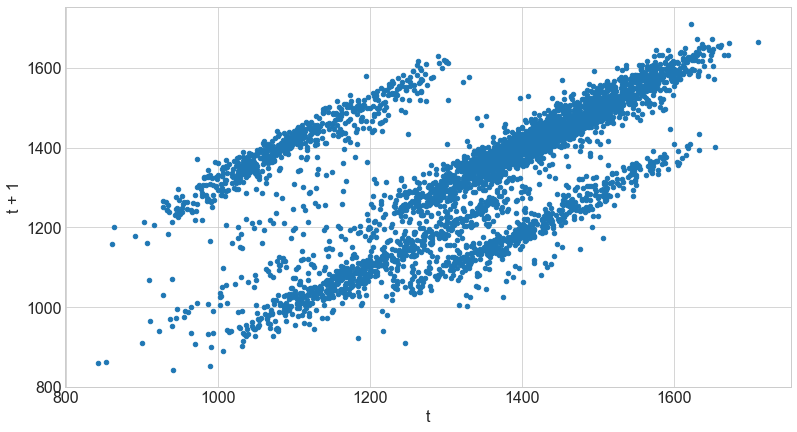

In [42]:
opsd_train['y(t+1)'] = opsd_train.consumption.shift(-1)
ax = opsd_train.plot.scatter(x='consumption', y='y(t+1)')
ax.set(xlabel='t',ylabel='t + 1')

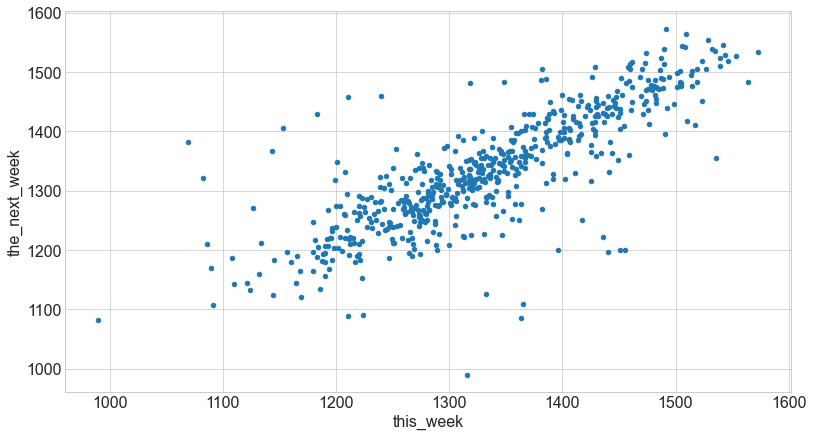

,this_week,wind,solar,wind_solar,year,y(t+1),the_next_week
date,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1380.521000,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1402.557571,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1491.646714,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1490.881571,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1512.038429,1501.403286
...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,2016.0,1538.445571,1538.948143
2016-12-11,1538.948143,334.445429,29.317000,363.762429,2016.0,1532.589000,1509.774000
2016-12-18,1509.774000,124.087286,17.804000,141.891286,2016.0,1505.795286,1417.620429


In [43]:
opsd_weekly = opsd_train.resample('W').mean()
opsd_weekly['the_next_week'] = opsd_weekly.consumption.shift(-1)
opsd_weekly = opsd_weekly.rename(columns={'consumption': 'this_week'})
opsd_weekly.plot.scatter(x='this_week', y='the_next_week')
plt.show()
opsd_weekly

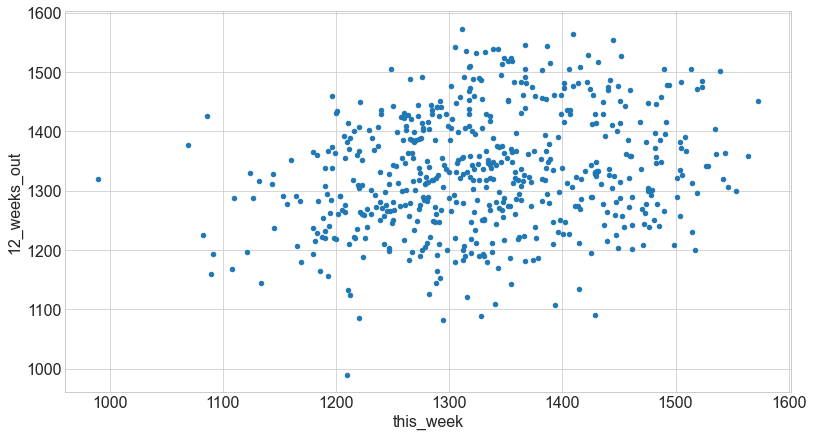

,this_week,wind,solar,wind_solar,year,y(t+1),12_weeks_out
date,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1380.521000,1376.688714
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1402.557571,1354.122000
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1491.646714,1347.883429
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1490.881571,1265.716143
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1512.038429,1231.136143
...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,2016.0,1538.445571,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,2016.0,1532.589000,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,2016.0,1505.795286,NaN


In [44]:
opsd_weekly = opsd_train.resample('W').mean()
opsd_weekly['12_weeks_out'] = opsd_weekly.consumption.shift(-12)
opsd_weekly = opsd_weekly.rename(columns={'consumption': 'this_week'})
opsd_weekly.plot.scatter(x='this_week', y='12_weeks_out')
plt.show()
opsd_weekly

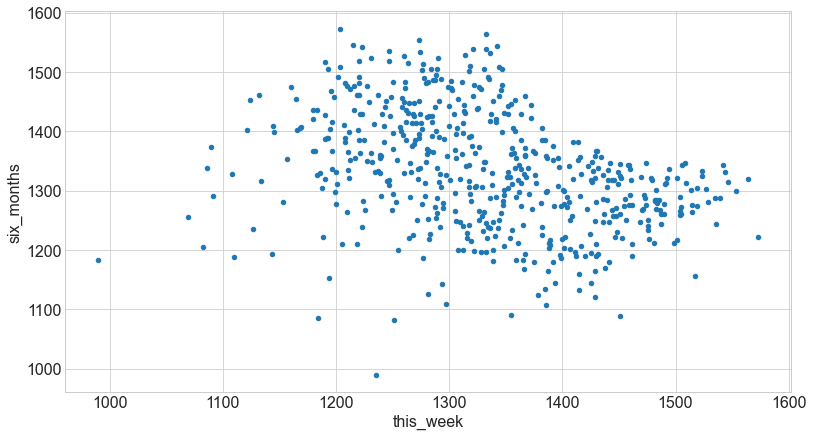

,this_week,wind,solar,wind_solar,year,y(t+1),six_months
date,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1380.521000,1254.896857
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1402.557571,1279.510571
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1491.646714,1260.945286
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1490.881571,1261.179714
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1512.038429,1263.756571
...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,2016.0,1538.445571,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,2016.0,1532.589000,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,2016.0,1505.795286,NaN


In [45]:
opsd_weekly = opsd_train.resample('W').mean()
opsd_weekly['six_months'] = opsd_weekly.consumption.shift(-26)
opsd_weekly = opsd_weekly.rename(columns={'consumption': 'this_week'})
opsd_weekly.plot.scatter(x='this_week', y='six_months')
plt.show()
opsd_weekly

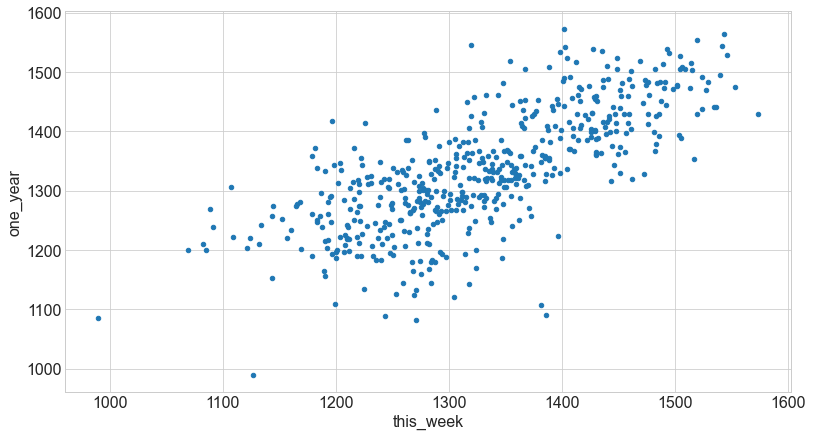

,this_week,wind,solar,wind_solar,year,y(t+1),one_year
date,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1380.521000,1200.677429
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1402.557571,1348.491286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1491.646714,1483.826143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1490.881571,1473.298000
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1512.038429,1514.921571
...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,2016.0,1538.445571,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,2016.0,1532.589000,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,2016.0,1505.795286,NaN


In [46]:
opsd_weekly = opsd_train.resample('W').mean()
opsd_weekly['one_year'] = opsd_weekly.consumption.shift(-52)
opsd_weekly = opsd_weekly.rename(columns={'consumption': 'this_week'})
opsd_weekly.plot.scatter(x='this_week', y='one_year')
plt.show()
opsd_weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 156)'>

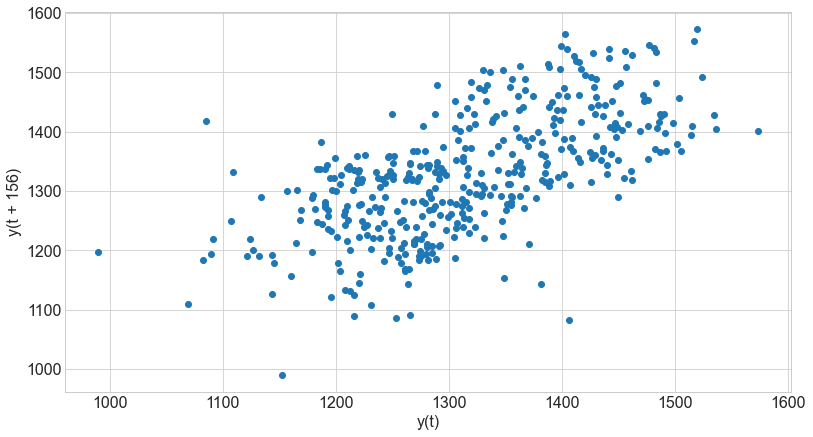

In [47]:
pd.plotting.lag_plot(opsd_train.consumption.resample('W').mean(), lag=156)

## 8) Autocorrelation plot

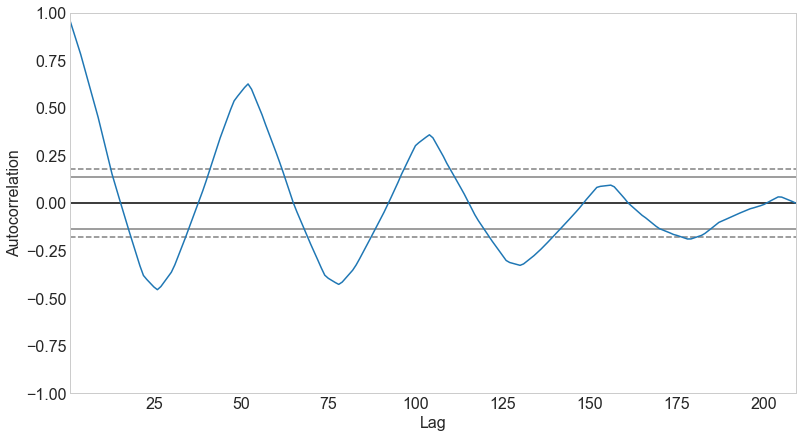

In [48]:
pd.plotting.autocorrelation_plot(store_train.sales_total.resample('W').mean())
plt.show()

## 9) Seasonal Decomposition

<AxesSubplot:xlabel='date'>

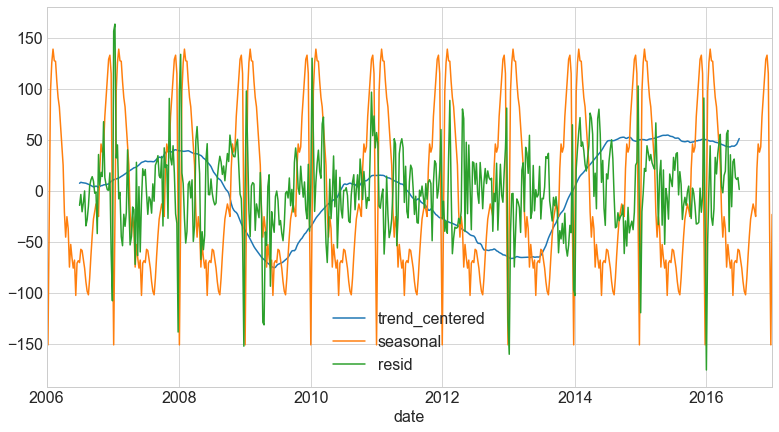

In [49]:
result = sm.tsa.seasonal_decompose(opsd_train.consumption.resample('W').mean())
decomposition = pd.DataFrame({
    'y' : result.observed,
    'trend' : result.trend,
    'seasonal' : result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()

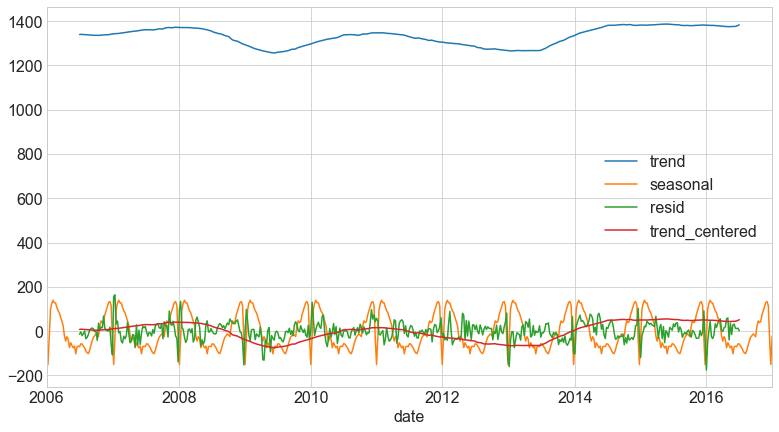

In [50]:
decomposition.iloc[:,1:].plot()
plt.show()

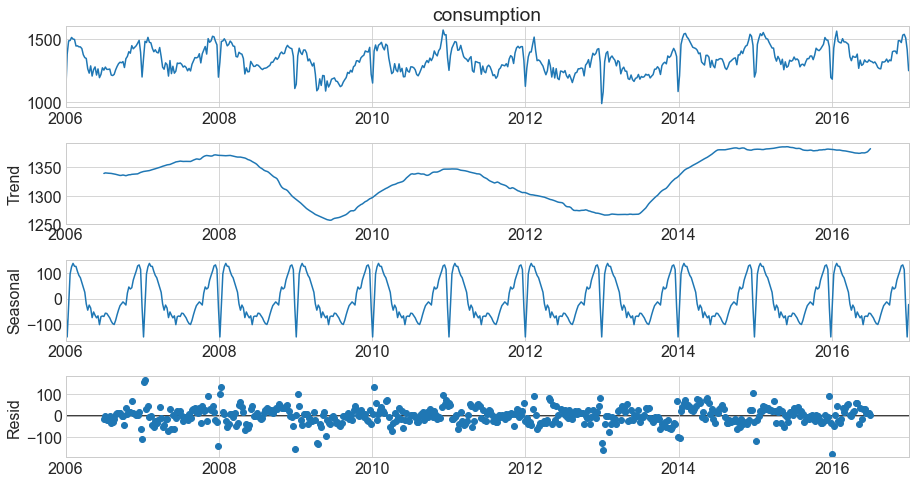

In [51]:
result.plot()
plt.show()

## 10) Area Plots

In [70]:
opsd_train = opsd_train.drop(columns='y(t+1)')

In [62]:
opsd_train = opsd_train.resample('W').mean()

In [63]:
opsd_train['consump_bin'] = pd.qcut(opsd_train.consumption, 4 , labels=['lowest','low','high','highest'])

In [64]:
opsd_train.groupby('consump_bin').resample('M').size().unstack(-1)

date,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,...,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31
consump_bin,,,,,,,,,,,,,,,,,,,,,
lowest,1.0,0.0,0.0,1.0,3.0,3.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
low,NaN,NaN,NaN,2.0,1.0,1.0,1.0,0.0,4.0,2.0,...,0.0,3.0,2.0,5.0,3.0,3.0,1.0,NaN,NaN,NaN
high,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,2.0,2.0,0.0,0.0,1.0,4.0,1.0,NaN,NaN
highest,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,NaN


In [65]:
opsd_train.groupby('consump_bin').mean()

,consumption,wind,solar,wind_solar,year
consump_bin,,,,,
lowest,1208.887776,70.814404,42.782051,113.596455,2010.347222
low,1297.338855,80.099886,51.218122,131.318008,2011.047619
high,1364.395022,95.194998,45.422353,140.617351,2011.405594
highest,1466.577264,130.516765,19.073575,149.590340,2011.180556


In [66]:
table = opsd_train.groupby('consump_bin').resample('M').size().unstack(0)
table.apply(lambda row : row / row.sum(),axis=1)

consump_bin,lowest,low,high,highest
date,,,,
2006-01-31,0.20,NaN,0.20,0.60
2006-02-28,0.00,NaN,0.00,1.00
2006-03-31,0.00,NaN,0.25,0.75
2006-04-30,0.20,0.40,0.40,0.00
2006-05-31,0.75,0.25,0.00,0.00
...,...,...,...,...
2016-09-30,0.00,0.75,0.25,0.00
2016-10-31,0.00,0.20,0.80,0.00
2016-11-30,0.00,NaN,0.25,0.75


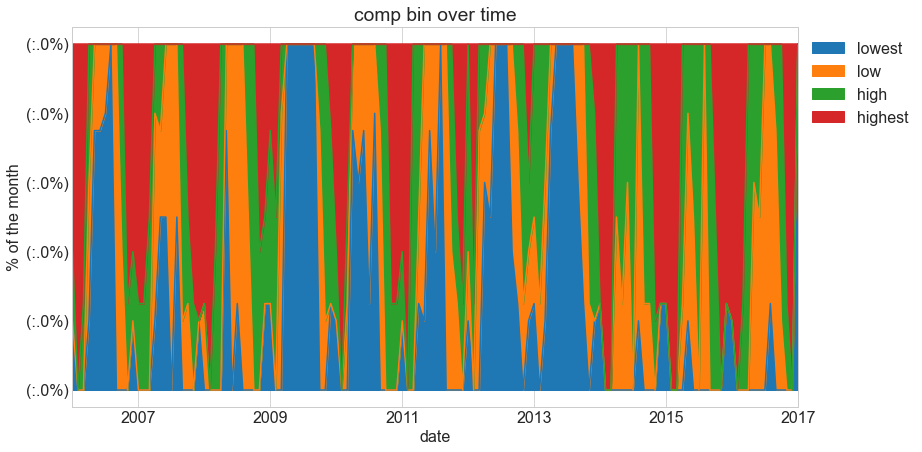

In [69]:
ax = (opsd_train.groupby('consump_bin')
     .resample('M')
     .size()
     .unstack(0)
     .apply(lambda row: row / row.sum(), axis=1)
     .plot.area(title='comp bin over time', ylabel='% of the month'))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter('(:.0%)'.format)

/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_10677/3553890473.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (opsd_train['2015']


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

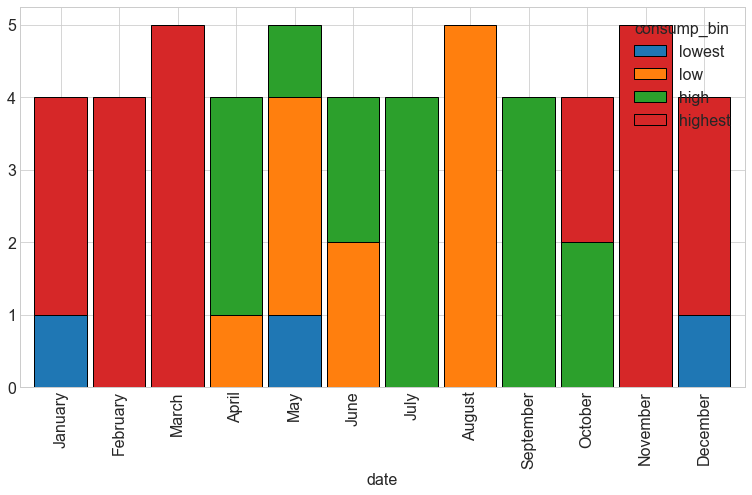

In [71]:
ax = (opsd_train['2015']
     .groupby('consump_bin')
     .resample('M')
     .size()
     .unstack(0)
     .plot.bar(stacked=True, width=.9, ec='black')
     )
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)